# Testing the Freindship Paradox 

The freindship paradox is a phemonimon found in the study of social networks, where netwrok science has been applied to the study of social structures. Simply put the clkaim of the freimndship paradox is that for a given individual (node) within a network, their freinds (conncted nodes) will on average have more friends than them. More formally:
$$ \text{Averege Freinds} < \text{Averege Freinds of Freinds} $$ 
$$ \mu < \mu \frac{\sigma^2}{\mu} $$

Where $\mu$ is the average degree and $\sigma^2$ is the variance of the degree.

While the title freidship paradox necessarily applys this logic to social relations, this is a broader phenomina of netweoks that can be found in the analysis of different complex systems. Because of this we are able to test the freindship paradox by looking at the properties of randon networks. To do this we will need three librarys in python: `networkx`, `numpy` and `statistics`.

In [189]:
import networkx as nx 
import numpy as np
import statistics

## Generating Random Graphs

In order to test the friendship paradox we can simulate freindship networks by generating random graph. As is implied by teh rande random graphs are grahs that have a random number of connections between nodes, The most common of theses is the Erdos-Renyi model which takes the parameters $G(n,p)$, where $n$ is teh number of nodse and $p$ is teh probability of a connection between two nodes. Thus if there are 10 nodes in an undirected graph and $10(10-1)$ possible edges, in a random graph with $n=10$ and $p=0.5$, then 45 edges will be generated at random.

We can use a series of functions to generae a random graph with edges connecting nodes within the graph depending on the specified level of proabability. Within the functions below a graph is initialised with a specified number of nodes and then edges between these nodes are created using the specified probablity. 

In [190]:
## Random Grap Function 

# all_pairs to map all potential edges 
def all_pairs(nodes):
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if i>j:
                yield u, v

# random_pairs uses flip:
def flip(p):
    return np.random.random() < p

# create random edges 
def random_pairs(nodes, p):
    for edge in all_pairs(nodes):
        if flip(p):
            yield edge

# Make_random_graph generates and returns the ER graph G(n, p):
def make_random_graph(n, p):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(random_pairs(nodes, p))
    return G 

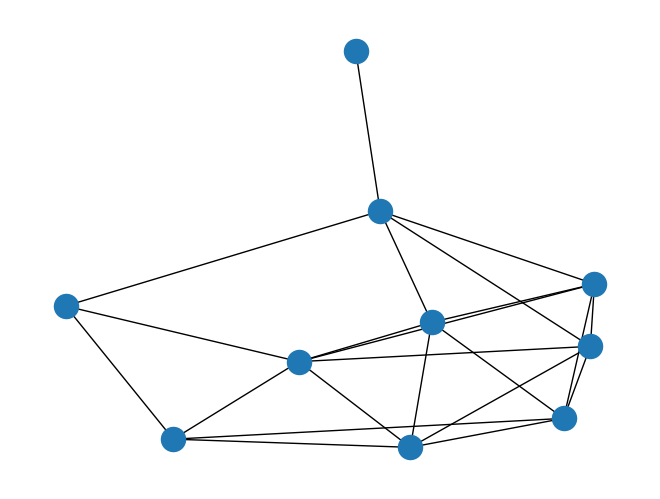

In [191]:
# Initialising random graph 
graph = make_random_graph(10, 0.5)
nx.draw(graph)

This can also simply be done using the `nx.erdos_renyi_graph(n,p)` function that is already provided in the `networkx` library. But building our own helps us to understand how a random graph is generated; however the `networkx` function provide a usefull short cut.

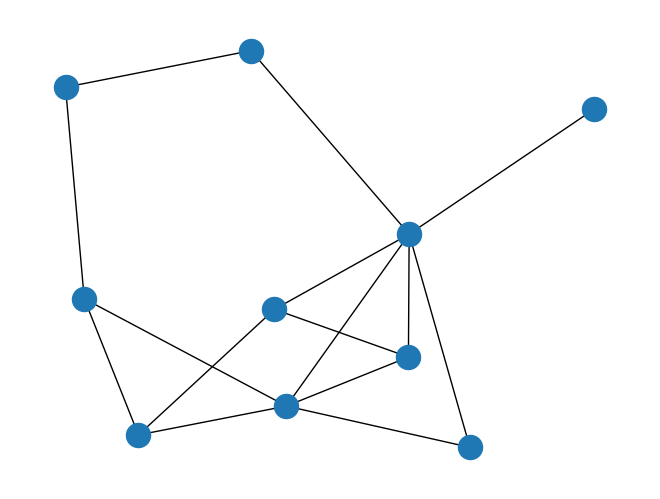

In [192]:
# networkx random graph generation 
graph = nx.erdos_renyi_graph(10, 0.3)
nx.draw(graph)

## Defining network functions

In order to test the freinship paradox we need to be able to tests the characteristics of networks, such as the degree for particular nodes. While this is simple enough to use built in functions provided by libraries such as `NetworkX`, building the functions that perform theses ourselves helps to build a more intuative understanding. In all we need functions taht perform two tasks:
* Calculate the average degree for nodes within the network 
* Calculate the average degree for the connections of each node in the network 

In [193]:
## Calculate the average degree for nodes within the network

def degrees(G):
    return [G.degree(node) for node in G]


def average_degree(G):
    degs = degrees(G)
    return np.mean(degs)

In [194]:
## Calculate the average degree for the connections of each node in the network 

def average_degree_of_neighbors(G):
    ave = {}
    for node in G.nodes():
        neighbors = list(G.neighbors(node))
        if len(neighbors) == 0:
            ave[node] = 0
        else: 
            neighbors_deg = [G.degree(neighbor) for neighbor in neighbors]
            ave[node] = sum(neighbors_deg) / len(neighbors_deg)
    return ave


def average_neighbors_degree(G):
    neighbors_degrees = average_degree_of_neighbors(G)
    return np.mean(list(neigh_degs))


## Testing The Paradox

To test the freindship paradox with a random graph $G(n,p)$ we simply need top test whether the average degree of nodes is less than the averege degree of neighboring nodes. This can be done using a function that takes in teh graph and then tests the condition using a boolean. 

In [198]:
# Function to check the freinship paradox 

def freind_check(G):
    ave_deg = average_degree(graph)
    neigh_deg = nx.average_neighbor_degree(graph)
    ave_neigh_deg = np.mean(list(neigh_deg))

    if (ave_deg < ave_neigh_deg) :
        print("Your freinds havev more freinds than you do!")
    else:
        print("Nice try... Myth busted!")

freind_check(graph)

Your freinds havev more freinds than you do


We can test the freindship paradox by simulating a number of random graphs that represent freinship groups. For each one we calsculate teh averege node degree and the average degree of a nodes neighbors. Using these results we can then test whether the average neigbors degree is higher than the average node, thus if these were freind networks it would hold true taht your freinds woudl have more freinds than you do. 

The below loop runs an iteration that craetes 1000  using the Erdos-Reney model random graphs $G(n,p)$ where teh paraeter $n$ is teh number of nodes and $p$ is the probability of a connection between any two nodes in the graph. For each itteration the freindship paradox is tested:
$$ \text{Averege Freinds} < \text{Averege Freinds of Freinds} $$ 
$$ \mu < \mu \frac{\sigma^2}{\mu} $$

The counter within the loop recordes the number of itterations where this holds and returns the fuinal result as a percentage of the number odf simulations.

In [196]:
## Testing the pasradox through simulation 

num_games = 1000
count = 0

for i in range(num_games):

    graph = make_random_graph(100, 0.1)
    
    mean_degree = average_degree(graph)
    ave_neigh_deg = average_neigbors_degree(graph)

    if (mean_degree < ave_neigh_deg):
        count += 1

print(f"Your freinds have more freinds than you do {count / num_games:.1%} of the time")


Your freinds have more freinds than you do 100.0% of the time


## Using NetworkX

The `NetworkX` library in python has theses function already built in. so we could also run the same loop using the `averege_degree_centrality` and `average_neigbor_degree`. However as these functions both return the results as a dictionary. In this case we are interested in the averege of both so we can convert both to `list`'s and then passing it to the `meam` function in `numpy`.

In [197]:
num_games = 100
count = 0

for i in range(num_games):

    graph = make_random_graph(100, 0.1)
    
    mean_degree = nx.average_degree_connectivity(graph)
    mean_degree = np.mean(list(mean_degree))
    
    ave_neigh_deg = nx.average_neighbor_degree(graph)
    ave_neigh_deg = np.mean(list(ave_neigh_deg))


    if (mean_degree < ave_neigh_deg):
        count += 1

print(f"Your freinds have more freinds than you do {count / num_games:.1%} of the time")


Your freinds have more freinds than you do 100.0% of the time
